<a href="https://colab.research.google.com/github/Nayde666/Tecnolochicas-DS/blob/main/Proyecto_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo predictivo para la selección de municipios con mayor probabilidad de sismos grandes, para el establecimiento de albergues.


Integrantes del equipo 8 - Tecnolochicas - 2024

- Judith Marquez Zempoalteca
- Montserrat San Martín
- Pamela Salgado Fernández
- Yaisa Michelle Arteaga Coronado
- Naydelin Alondra Zavala Zúñiga
- Caren Castaño

## Introducción

Cada año, se registran más de 200.000 terremotos en nuestro planeta, aunque, según estimaciones, se producen varios millones.
Muchos pasan inadvertidos porque son demasiado leves para que podamos sentirlos, o porque ocurren en zonas remotas que no están monitoreadas.

  Las estrategias de obtención y difusión de datos sobre el origen y consecuencias de los terremotos son fundamentales, sobre todo en zonas altamente sísmicas como México.

  Científicos de varias instituciones académicas, entre ellas la Universidad Nacional Autónoma de México (UNAM), implementan la Red Atrapa Sismos (RAS), la cual consiste en colocar sensores que detectan movimientos telúricos al puerto USB de computadoras con conexión a Internet, pertenecientes a dependencias públicas y privadas, con el propósito de identificar las vibraciones del suelo durante un temblor, gracias a esto casi 10 segundos de que se detecta la ciudadania es alertada sobre los hechos que estan sucediendo.

  Gracias a ello, se tienen registros desde al año 1925, ¿Qué podemos hacer con esta información?

  - Construir casas y edificios con estructuras y materiales diseñados para resistir sismos, evitando asi el mayor numero de pérdidas tanto humanas como materiales.
  
  - Evacuar con antelación las zonas que se verán afectadas -como en el caso de un huracán- también contribuiría en este sentido, sin embargo, esto no puede hacerse - salvo algunos minutos antes - ya que, los sismos, son imposibles de predecir.

  Otro punto a contemplar, es que en muchos estados de la republica méxicana su gran población no cuenta con los recursos para tener casas con estructuras fuertes ¿Qué pasa con estas personas?
  Nuestro proyecto va enfocado en establecer puntos estrategicos, donde es de mayor beneficio la construcción de albergues con estructuras especializadas para estos casos, partiendo de un analisis entre la relación de factores como la población, estado/municipios, la cantidad de sismos y los registros en donde existe mayor riesgo de sismos fuertes.


------------------------------------------------------------------------------

## Objetivos

--------------------------------------------------------------------------------
 -  Con este proyecto NO se busca la predicción de sismos, tenemos claro que es imposible, buscamos predecir los puntos que puedan ser clave para poder actuar y sirvan para brindar refugio y seguridad en caso de una emergencia, si bien no podemos predecir, pero si prevenir.

 - Recolectar registros de sismos particularmente de la Republica Méxicana.
 - Obtener una muestra que será el estado con más registros de sismos en cierto tiempo.
 - Seleccionar los municipios con mayor registros.
 - Elegir las regiones en donde más personas puedan beneficiarse.

## Planteamiento


- ¿Existe correlación entre los eventos registrados?
- ¿Los sismos ocurren de forma continua en algun mes especifico del año?
- ¿Un sismo con mayor magnitud implica mayor daño o este depende de la profundidad?
- ¿Qué regiones de México presentan mayor actividad sismológica?

## Análisis Exploratorio

- Para este proyecto contamos con un dataset, que registra un total de 297,251 eventos, ocurridos desde 1925 hasta 2023, en toda la republica mexicana.
- Este dataset fue obtenido en http://www2.ssn.unam.mx:8080/catalogo/ con datos brindados por el Servicio Sismológico Nacional adscrito al Instituto de Geofísica de la Universidad Nacional Autónoma de México.

Comenzamos con la importación de las librerias necesarias para trabajar con los datos y trazar graficos.

La librerias son
  - **pandas**: diseñada específicamente para la manipulación y el análisis de datos  
  - **numpy**: es muy útil para realizar cálculos lógicos y matemáticos sobre cuadros y matrices.
  - **seaborn**: es una librería de visualización de datos, ofrece una interfaz de alto nivel para la creación de atractivas gráficas.
  - **matplotlib**: nos permite observar el comportamiento de los datos de una forma mas dinámica

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [ ]:
# Creación de nuestro dataframe
df_sismos = pd.read_csv('/content/drive/MyDrive/Tecnolochicas_AD/Proyecto Sismos en México/Datasets/SSNMX_catalogo_19230101_20240201.csv')
df_sismos

<ipython-input-6-66fd2748f26e>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sismos = pd.read_csv('/content/drive/MyDrive/Tecnolochicas_AD/Proyecto Sismos en México/Datasets/SSNMX_catalogo_19230101_20240201.csv')


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,07/08/1925,01:47:48,6.7,19.00,-102.00,100,"10 km al SURESTE de NUEVA ITALIA, MICH",07/08/1925,07:47:48,revisado
1,16/11/1925,05:54:54,7,18.00,-107.00,33,"291 km al SUROESTE de CIHUATLAN, JAL",16/11/1925,11:54:54,revisado
2,10/12/1925,08:14:42,7,15.50,-92.50,33,"31 km al NOROESTE de MOTOZINTLA, CHIS",10/12/1925,14:14:42,revisado
3,09/02/1928,22:39:37,6.5,18.26,-97.99,84,"9 km al NORESTE de ACATLAN DE OSORIO, PUE",10/02/1928,04:39:37,revisado
4,21/03/1928,22:17:30,7.5,15.67,-96.10,33,"12 km al SURESTE de CRUCECITA, OAX",22/03/1928,04:17:30,revisado
...,...,...,...,...,...,...,...,...,...,...
297246,01/02/2024,04:57:32,3.4,16.38,-98.22,5.4,"19 km al OESTE de PINOTEPA NACIONAL, OAX",01/02/2024,10:57:32,verificado
297247,01/02/2024,07:19:39,4.0,17.14,-100.03,39.1,"16 km al NORESTE de COYUCA DE BENITEZ, GRO",01/02/2024,13:19:39,verificado
297248,01/02/2024,08:14:48,4.1,14.97,-92.46,110.7,"19 km al SUR de HUIXTLA, CHIS",01/02/2024,14:14:48,verificado
297249,01/02/2024,10:57:43,4.0,15.15,-94.47,16.4,"128 km al SUROESTE de TONALA, CHIS",01/02/2024,16:57:43,verificado


Información general de nuestro dataset

In [ ]:
df_sismos.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,07/08/1925,01:47:48,6.7,19.00,-102.00,100,"10 km al SURESTE de NUEVA ITALIA, MICH",07/08/1925,07:47:48,revisado
1,16/11/1925,05:54:54,7,18.00,-107.00,33,"291 km al SUROESTE de CIHUATLAN, JAL",16/11/1925,11:54:54,revisado
2,10/12/1925,08:14:42,7,15.50,-92.50,33,"31 km al NOROESTE de MOTOZINTLA, CHIS",10/12/1925,14:14:42,revisado
3,09/02/1928,22:39:37,6.5,18.26,-97.99,84,"9 km al NORESTE de ACATLAN DE OSORIO, PUE",10/02/1928,04:39:37,revisado
4,21/03/1928,22:17:30,7.5,15.67,-96.10,33,"12 km al SURESTE de CRUCECITA, OAX",22/03/1928,04:17:30,revisado


In [ ]:
# nuestro dataframe cuenta con 297251 filas y 10 columnas
df_sismos.shape

(297251, 10)

¿Qué tipo de datos vamos a manejar?

In [ ]:
df_sismos.dtypes

Fecha                          object
Hora                           object
Magnitud                       object
Latitud                       float64
Longitud                      float64
Profundidad                    object
Referencia de localizacion     object
Fecha UTC                      object
Hora UTC                       object
Estatus                        object
dtype: object

In [ ]:
# Convertimos las fechas a tipo Datetime para poder hacer uso de ellas mas adelante
df_sismos['Fecha'] = pd.to_datetime(df_sismos['Fecha'])

<ipython-input-7-017c166cac1c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sismos['Fecha'] = pd.to_datetime(df_sismos['Fecha'])


In [ ]:
# Convertimos magnitud y profundidad en numericos
df_sismos['Magnitud'] = pd.to_numeric(df_sismos['Magnitud'], errors='coerce')
df_sismos['Profundidad'] = pd.to_numeric(df_sismos['Profundidad'], errors='coerce')
df_sismos.dtypes

Fecha                         datetime64[ns]
Hora                                  object
Magnitud                             float64
Latitud                              float64
Longitud                             float64
Profundidad                          float64
Referencia de localizacion            object
Fecha UTC                             object
Hora UTC                              object
Estatus                               object
dtype: object

In [ ]:
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297251 entries, 0 to 297250
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       297251 non-null  datetime64[ns]
 1   Hora                        297251 non-null  object        
 2   Magnitud                    279602 non-null  float64       
 3   Latitud                     297251 non-null  float64       
 4   Longitud                    297251 non-null  float64       
 5   Profundidad                 297180 non-null  float64       
 6   Referencia de localizacion  297251 non-null  object        
 7   Fecha UTC                   297251 non-null  object        
 8   Hora UTC                    297251 non-null  object        
 9   Estatus                     297251 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 22.7+ MB


In [ ]:
df_sismos.columns

Index(['Fecha', 'Hora', 'Magnitud', 'Latitud', 'Longitud', 'Profundidad',
       'Referencia de localizacion', 'Fecha UTC', 'Hora UTC', 'Estatus'],
      dtype='object')

In [ ]:
# Observamos que existen datos que se repiten en columnas por lo que ya no son
# necesarioas y las eliminamos.

df_sismos = df_sismos.drop('Fecha UTC', axis=1)
df_sismos = df_sismos.drop('Hora UTC', axis=1)

In [ ]:
# Corroboramos que ya se han eliminado

df_sismos.columns

Index(['Fecha', 'Hora', 'Magnitud', 'Latitud', 'Longitud', 'Profundidad',
       'Referencia de localizacion', 'Estatus'],
      dtype='object')

Editaremos un poco los nombres de las columnas para que se entiendan bien los conceptos

In [ ]:
reenombre_columnas = {'Fecha' : 'fecha',
                      'Hora' : 'hora',
                      'Magnitud' : 'magnitud(ml)', # unidad escala de magnitud local
                      'Profundidad' : 'profundidad(km)', # kilometros
                      'Referencia de localizacion' : 'referencia_de_localizacion',
                      'Estatus': 'estatus'}

In [ ]:
# reasignamos las nuevas columnas a nuestro df

df_sismos = df_sismos.rename(columns = reenombre_columnas)

In [ ]:
# Nuestro dataset es grande por lo que necesitamos asegurarnos que trabajaremos
# con valores "validos", hacemos la suma de NaNs

df_sismos.isna().sum()

fecha                             0
hora                              0
magnitud(ml)                  17649
Latitud                           0
Longitud                          0
profundidad(km)                  71
referencia_de_localizacion        0
estatus                           0
dtype: int64

- Podemos visualizar que existen valores NaN's, y esto es por el cambio que realizamos anteriormente, pues magnitud y profundidad eran de tipo "objeto", cuando los asignamos como valores numéricos, los registros como string son datos que no nos sirven. "no calculable"

In [ ]:
df_sismos[10240:10250]

,fecha,hora,magnitud(ml),Latitud,Longitud,profundidad(km),referencia_de_localizacion,estatus
10240,1982-09-23,08:31:02,no calculable,15.87,-93.77,33,"24 km al SUR de TONALA, CHIS",revisado
10241,1982-09-23,10:44:18,no calculable,16.23,-96.58,33,"11 km al SUR de MIAHUATLAN, OAX",revisado
10242,1982-09-23,11:45:23,no calculable,15.83,-93.91,33,"33 km al SUROESTE de TONALA, CHIS",revisado
10243,1982-09-23,16:13:20,no calculable,14.28,-93.34,33,"134 km al SUROESTE de HUIXTLA, CHIS",revisado
10244,1982-09-23,18:43:47,no calculable,13.28,-91.63,33,"165 km al SURESTE de CD HIDALGO, CHIS",revisado
10245,1982-09-23,21:37:50,no calculable,14.31,-93.09,33,"109 km al SUROESTE de CD HIDALGO, CHIS",revisado
10246,1982-09-24,08:13:25,no calculable,14.62,-94.36,33,"171 km al SUROESTE de PIJIJIAPAN, CHIS",revisado
10247,1982-09-24,16:42:37,no calculable,18.34,-93.42,33,"22 km al NOROESTE de COMALCALCO, TAB",revisado
10248,1982-09-24,22:13:41,no calculable,16.11,-94.92,33,"31 km al SURESTE de SALINA CRUZ, OAX",revisado
10249,1982-09-25,02:56:54,no calculable,15.35,-94.88,33,"98 km al SURESTE de SALINA CRUZ, OAX",revisado


Podemos observar que en magnitud obtenemos 'no calculable' en Magnitud ¿Podemos continuar con estos datos?

Calculemos cuantas filas tienen este registro

- A comparación de la cantidad total de registros (297251) los registros que en la columna de "Magnitud" contienes "no calculable" son 17649, que representan el 5.93% de nuestro dataset


- ¿Qué haremos con estos datos?
    - Tenemos la opción de eliminarlas
    - Podemos dejarlas por si más adelante nos ayuda con la visualización de estados donde han ocurrido, a pesar de no contar con su magnitud
  


--------------------------------------------------------------------------------

Implementamos una función para filtrar de forma mas eficiente el numero de sismos ocurridos por cada estado y en determinados años.

- Nos enfocaremos particularmente en el ultimo año, contemplando 2022/2024

- ¿En todos los estados existen registros?

In [ ]:
# Los elementos de un set son únicos, lo que significa que no puede haber
# elementos duplicados.
estados_distintos = set()

# Iteramos sobre cada registro en la columna "Referencia de Localizacion"
for registro in df_sismos['referencia_de_localizacion']:
    # Dividimos el texto por la coma y obtenemos la segunda parte
    estado_despues_coma = registro.split(',')[1].strip()
    estados_distintos.add(estado_despues_coma)

estados_distintos.remove('')
estados_distintos.remove('N')

# Imprimimos los distintos estados
print(len(estados_distintos))
print(estados_distintos)

32
{'HGO', 'BC', 'SLP', 'CHIS', 'JAL', 'YUC', 'QR', 'TLAX', 'MEX', 'COAH', 'COL', 'MOR', 'QRO', 'GRO', 'NAY', 'MICH', 'AGS', 'SON', 'BCS', 'OAX', 'SIN', 'DGO', 'CHIH', 'ZAC', 'CDMX', 'VER', 'PUE', 'GTO', 'TAMS', 'TAB', 'NL', 'CAMP'}


Notamos que hay un registro que sobra, ya sea por que se repitio o porque se corto la localizacion por una coma, decidimos localizarlo y eliminarlo de forma que no afecte al momento de hacer nuestro analisis

- Trabajaremos especificamente con los registros obtenidos desde el 2022 al 2024

In [ ]:
def filtrar_sismos(df_sismos, estado, año_inicio, año_fin):
    df_estado_desde_año = df_sismos[df_sismos['referencia_de_localizacion'].str.contains(estado, case=False) &
                                    (df_sismos['fecha'].dt.year >= año_inicio) &
                                    (df_sismos['fecha'].dt.year <= año_fin)]
    total_registros = len(df_estado_desde_año)
    print(estado.upper() + ":", total_registros)

    return total_registros

sismos_por_estado = {}

In [ ]:
# Filtrar sismos por estado y por año

# sismos_por_estado['OAX'] = sismos_2023_2024_oax=filtrar_sismos(df_sismos, 'OAX', 2023, 2024)
# sismos_por_estado['CDMX'] = filtrar_sismos(df_sismos, 'CDMX', 2023, 2024)
# ...

# Para no hacerlo manual y optimizarlo implementamos:

for estado in estados_distintos:
    sismos_por_estado[estado] = filtrar_sismos(df_sismos, estado, 2022, 2024)


MEX: 104
CHIH: 281
TAB: 111
CAMP: 1
QRO: 2
ZAC: 357
NAY: 56
YUC: 1265
PUE: 2133
GTO: 12
MOR: 299
TAMS: 24
MICH: 6539
JAL: 3260
NL: 113
COAH: 54
BC: 7535
QR: 2
TLAX: 175
COL: 3146
CHIS: 6845
DGO: 20
VER: 1364
CDMX: 113
BCS: 921
GRO: 9477
SIN: 249
HGO: 248
SLP: 127
OAX: 16003
AGS: 2
SON: 512


In [ ]:
# Ordenar el diccionario por el valor (número de sismos) en orden descendente
sismos_por_estado_ordenados = dict(sorted(sismos_por_estado.items(), key=lambda x: x[1], reverse=True))

# Imprimir el diccionario ordenado
print(sismos_por_estado_ordenados)

{'OAX': 16003, 'GRO': 9477, 'BC': 7535, 'CHIS': 6845, 'MICH': 6539, 'JAL': 3260, 'COL': 3146, 'PUE': 2133, 'VER': 1364, 'YUC': 1265, 'BCS': 921, 'SON': 512, 'ZAC': 357, 'MOR': 299, 'CHIH': 281, 'SIN': 249, 'HGO': 248, 'TLAX': 175, 'SLP': 127, 'NL': 113, 'CDMX': 113, 'TAB': 111, 'MEX': 104, 'NAY': 56, 'COAH': 54, 'TAMS': 24, 'DGO': 20, 'GTO': 12, 'QRO': 2, 'QR': 2, 'AGS': 2, 'CAMP': 1}


In [ ]:
# Obtener el estado con más sismos
estado_mas_sismos = list(sismos_por_estado_ordenados.keys())[0]

print("El estado con más sismos es:", estado_mas_sismos.upper())

El estado con más sismos es: OAX


Podemos observar que el estado con más sismos registrados, tan solo en 2022 y 2024, es Oaxaca con 16003 registros

In [ ]:
df_sismos_por_estado = pd.DataFrame(list(sismos_por_estado.items()), columns=['Estado', 'Cantidad de Sismos'])

print(df_sismos_por_estado)

   Estado  Cantidad de Sismos
0     MEX                 104
1    CHIH                 281
2     TAB                 111
3    CAMP                   1
4     QRO                   2
5     ZAC                 357
6     NAY                  56
7     YUC                1265
8     PUE                2133
9     GTO                  12
10    MOR                 299
11   TAMS                  24
12   MICH                6539
13    JAL                3260
14     NL                 113
15   COAH                  54
16     BC                7535
17     QR                   2
18   TLAX                 175
19    COL                3146
20   CHIS                6845
21    DGO                  20
22    VER                1364
23   CDMX                 113
24    BCS                 921
25    GRO                9477
26    SIN                 249
27    HGO                 248
28    SLP                 127
29    OAX               16003
30    AGS                   2
31    SON                 512


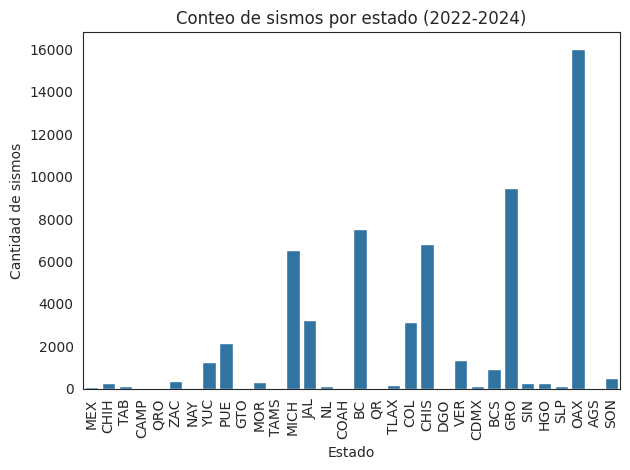

In [ ]:
# Crear el histograma utilizando Seaborn
df_sismos_por_estado = pd.DataFrame.from_dict(sismos_por_estado, orient='index', columns=['Cantidad de Sismos'])

df_sismos_por_estado.reset_index(inplace=True)
df_sismos_por_estado = df_sismos_por_estado.rename(columns={'index': 'Estado'})

# Crear el histograma utilizando Seaborn
sns.barplot(x='Estado', y='Cantidad de Sismos', data=df_sismos_por_estado)
plt.title('Conteo de sismos por estado (2022-2024)')
plt.xlabel('Estado')
plt.ylabel('Cantidad de sismos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ahora que hemos comprobado que Oaxaca ha sido el estado con mayor numero de sismos en el periodo de años 2022-2024, podemos examinar con mas detalle los datos de los sismos ocurridos en ese estado

- 2.0-3.0 Micro Magnitud – No son perceptibles.
- 3.0-3.9 Menor Magnitud – Perceptibles con poco movimiento y sin daño.
- 4.0-4.9 Ligera Magnitud – Perceptibles con movimiento de objetos y rara vez produce daño.
- 5.0-5.9 Moderada (o Mediana) Magnitud – Puede causar daños mayores en construcciones débiles o mal construidas.
- 6.0-6.9 Fuerte Magnitud – Pueden ser destructivos.
- 7.0-7.9 Mayor Magnitud – Pueden ser destructivos en zonas extensas.
- 8.0-9.9 Gran Magnitud – Catastróficos, provocando destrucción total en zonas cercanas al epicentro.
- 10 o + Magnitud Épica – Jamás registrado, puede generar una extinción local.

--------------------------------------------------------------------------------
Según su profundidad

- Superficiales: Corresponden a los temblores que ocurren en la corteza terrestre, hasta los 70 kilómetros de profundidad.
- Intermedios: Aquellos movimientos que tienen lugar entre los 70 y 450 kilómetros de profundidad.
- Profundos: Sismos cuyo hipocentro se encuentra más allá de los 450 kilómetros de profundidad.

OAX: 16003


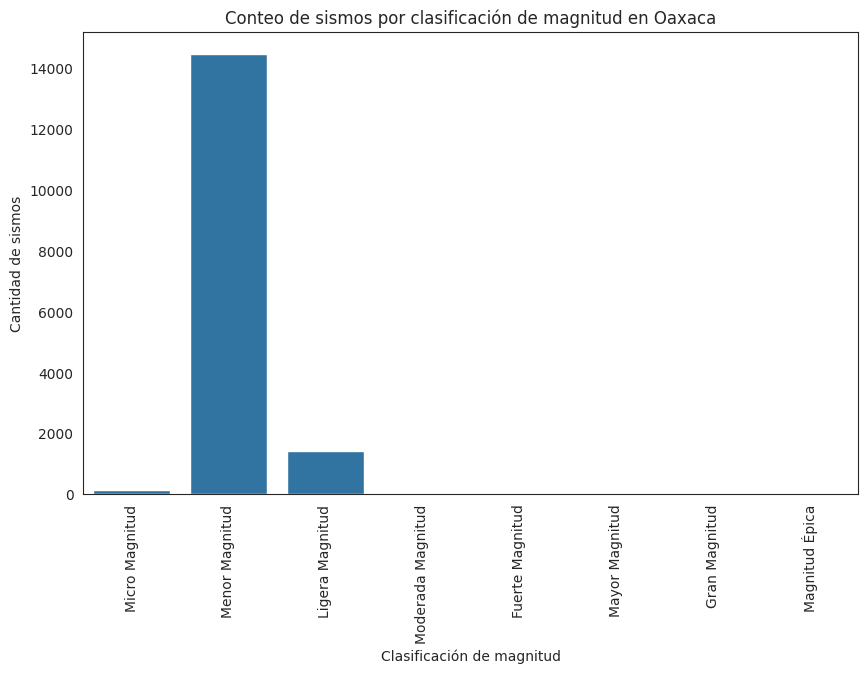

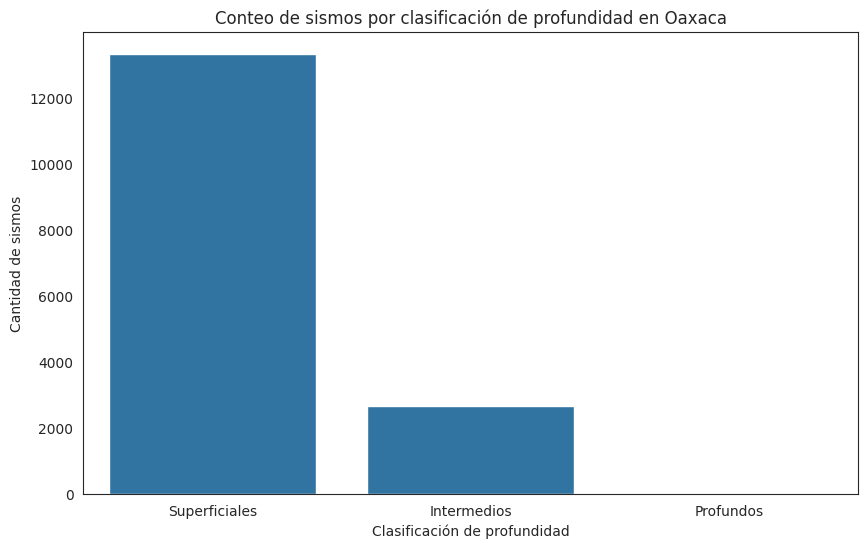

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def filtrar_y_contar_sismos(df_sismos, estado, año_inicio, año_fin):
    df_estado_desde_año = df_sismos[df_sismos['referencia_de_localizacion'].str.contains(estado, case=False) &
                                    (df_sismos['fecha'].dt.year >= año_inicio) &
                                    (df_sismos['fecha'].dt.year <= año_fin)]

    # conteo magnitud
    conteo_magnitudes = {
        'Micro Magnitud': 0,
        'Menor Magnitud': 0,
        'Ligera Magnitud': 0,
        'Moderada Magnitud': 0,
        'Fuerte Magnitud': 0,
        'Mayor Magnitud': 0,
        'Gran Magnitud': 0,
        'Magnitud Épica': 0
    }
    # conteo profundidad
    conteo_profundidades = {
        'Superficiales': 0,
        'Intermedios': 0,
        'Profundos': 0
    }

    # clasificacion de sismo por su magnitud y profundidad y actualizar el conteo
    for magnitud, profundidad in zip(df_estado_desde_año['magnitud(ml)'], df_estado_desde_año['profundidad(km)']):
        if magnitud >= 2.0 and magnitud < 3.0:
            conteo_magnitudes['Micro Magnitud'] += 1
        elif magnitud >= 3.0 and magnitud < 4.0:
            conteo_magnitudes['Menor Magnitud'] += 1
        elif magnitud >= 4.0 and magnitud < 5.0:
            conteo_magnitudes['Ligera Magnitud'] += 1
        elif magnitud >= 5.0 and magnitud < 6.0:
            conteo_magnitudes['Moderada Magnitud'] += 1
        elif magnitud >= 6.0 and magnitud < 7.0:
            conteo_magnitudes['Fuerte Magnitud'] += 1
        elif magnitud >= 7.0 and magnitud < 8.0:
            conteo_magnitudes['Mayor Magnitud'] += 1
        elif magnitud >= 8.0 and magnitud < 10.0:
            conteo_magnitudes['Gran Magnitud'] += 1
        elif magnitud >= 10.0:
            conteo_magnitudes['Magnitud Épica'] += 1

        if profundidad <= 70:
            conteo_profundidades['Superficiales'] += 1
        elif profundidad > 70 and profundidad <= 450:
            conteo_profundidades['Intermedios'] += 1
        elif profundidad > 450:
            conteo_profundidades['Profundos'] += 1

    total_registros = len(df_estado_desde_año)
    print(estado.upper() + ":", total_registros)

    return conteo_magnitudes, conteo_profundidades

conteo_magnitudes_oax, conteo_profundidades_oax = filtrar_y_contar_sismos(df_sismos, 'OAX', 2022, 2024)


fig, axs_magnitudes = plt.subplots(figsize=(10, 6))

# magnitud grafica
sns.barplot(x=list(conteo_magnitudes_oax.keys()), y=list(conteo_magnitudes_oax.values()), ax=axs_magnitudes)
axs_magnitudes.set_title('Conteo de sismos por clasificación de magnitud en Oaxaca')
axs_magnitudes.set_xlabel('Clasificación de magnitud')
axs_magnitudes.set_ylabel('Cantidad de sismos')
plt.xticks(rotation=90)
fig, axs_profundidades = plt.subplots(figsize=(10, 6))

# profundiad grafica
sns.barplot(x=list(conteo_profundidades_oax.keys()), y=list(conteo_profundidades_oax.values()), ax=axs_profundidades)
axs_profundidades.set_title('Conteo de sismos por clasificación de profundidad en Oaxaca')
axs_profundidades.set_xlabel('Clasificación de profundidad')
axs_profundidades.set_ylabel('Cantidad de sismos')

# Mostrar las gráficas

plt.show()



--------------------------------------------------------------------------------

In [ ]:
# Filtramos el dataset en los sismos ocurridos el año 2022 en Oaxaca
df_oaxaca_2022 = df_sismos[df_sismos['referencia_de_localizacion'].str.contains('OAX', case=False) & (df_sismos['fecha'].dt.year == 2022)]
df_oaxaca_2022.reset_index(inplace=True)# reiniciamos los indices

df_oaxaca_2022

,index,fecha,hora,magnitud(ml),Latitud,Longitud,profundidad(km),referencia_de_localizacion,estatus
0,240881,2022-01-01,01:17:34,3.8,16.0447,-97.0378,25.9,"20 km al NORTE de PUERTO ESCONDIDO, OAX",revisado
1,240884,2022-01-01,03:08:03,3.6,16.2815,-98.0000,6.6,"9 km al SURESTE de PINOTEPA NACIONAL, OAX",revisado
2,240886,2022-01-01,03:45:00,3.7,15.7657,-96.3670,35.2,"11 km al ESTE de S PEDRO POCHUTLA, OAX",revisado
3,240890,2022-01-01,05:54:01,3.5,16.4588,-94.5318,92.4,"32 km al ESTE de UNION HIDALGO, OAX",revisado
4,240892,2022-01-01,06:12:57,3.6,16.2425,-98.0570,6.6,"11 km al SUR de PINOTEPA NACIONAL, OAX",revisado
...,...,...,...,...,...,...,...,...,...
8554,270730,2022-12-31,18:23:24,3.8,15.8710,-98.6422,13.3,"82 km al SUROESTE de PINOTEPA NACIONAL, OAX",revisado
8555,270735,2022-12-31,19:17:31,3.8,16.1425,-95.3900,3.2,"21 km al OESTE de SALINA CRUZ, OAX",revisado
8556,270736,2022-12-31,19:21:20,3.7,15.9053,-98.3545,16.0,"58 km al SUROESTE de PINOTEPA NACIONAL, OAX",revisado
8557,270742,2022-12-31,21:43:06,3.7,17.2370,-94.9918,53.2,"41 km al NORTE de MATIAS ROMERO, OAX",revisado


In [ ]:
promedio_magnitud_2022 = df_oaxaca_2022['magnitud(ml)'].mean()
promedio_magnitud_2022

3.5645285664213113

---------------------------------------------------------------------------------------------



In [ ]:
# Filtramos el dataset en los sismos ocurridos el año 2023 en Oaxaca
df_oaxaca_2023 = df_sismos[df_sismos['referencia_de_localizacion'].str.contains('OAX', case=False) & (df_sismos['fecha'].dt.year == 2023)]
df_oaxaca_2023.reset_index(inplace=True)# reiniciamos los indices

df_oaxaca_2023

,index,fecha,hora,magnitud(ml),Latitud,Longitud,profundidad(km),referencia_de_localizacion,estatus
0,270755,2023-01-01,02:27:56,3.9,16.8492,-94.9207,8.0,"13 km al ESTE de MATIAS ROMERO, OAX",revisado
1,270757,2023-01-01,03:01:47,3.8,15.8617,-95.1885,26.2,"35 km al SUR de SALINA CRUZ, OAX",revisado
2,270760,2023-01-01,04:39:37,3.7,16.8637,-96.5190,50.5,"11 km al SUROESTE de TLACOLULA, OAX",revisado
3,270763,2023-01-01,05:05:09,4.0,15.6735,-95.4058,11.0,"61 km al SUROESTE de SALINA CRUZ, OAX",revisado
4,270764,2023-01-01,06:19:27,3.9,15.7930,-95.5198,6.4,"55 km al SUROESTE de SALINA CRUZ, OAX",revisado
...,...,...,...,...,...,...,...,...,...
6792,294925,2023-12-31,18:04:30,3.8,15.2100,-94.6400,10.0,"122 km al SURESTE de SALINA CRUZ, OAX",verificado
6793,294928,2023-12-31,21:19:20,3.1,16.6900,-94.9900,6.3,"19 km al NORESTE de CD IXTEPEC, OAX",verificado
6794,294930,2023-12-31,22:17:51,4.3,15.8600,-98.1300,8.9,"54 km al SUR de PINOTEPA NACIONAL, OAX",verificado
6795,294931,2023-12-31,22:20:31,3.5,15.7600,-98.1300,11.9,"65 km al SUR de PINOTEPA NACIONAL, OAX",verificado


In [ ]:
promedio_magnitud_2023 = df_oaxaca_2023['magnitud(ml)'].mean()
promedio_magnitud_2023

3.601809621892011

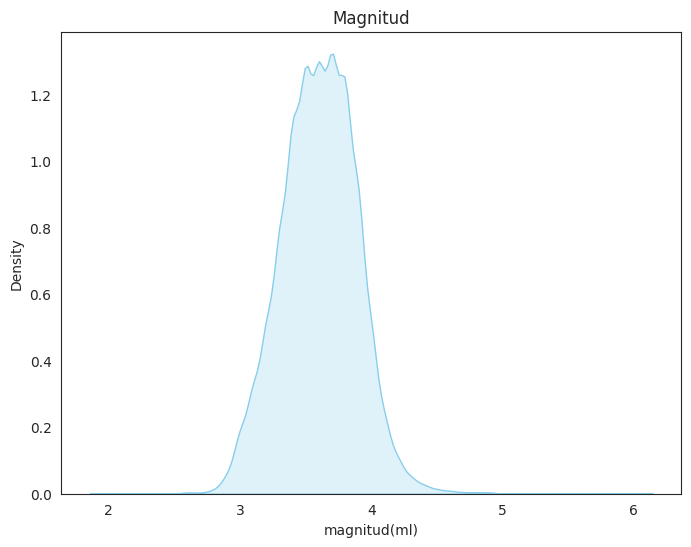

In [ ]:
plt.figure(figsize=(8, 6))

# Gráfica de densidad utilizando Seaborn
sns.kdeplot(df_oaxaca_2023['magnitud(ml)'], fill=True, color='skyblue', label='Densidad')

# Ajustes adicionales
plt.title('Magnitud')
plt.show()

In [ ]:
# Filtramos el dataset en los sismos ocurridos el año 2024 en Oaxaca
df_oaxaca_2024 = df_sismos[df_sismos['referencia_de_localizacion'].str.contains('OAX', case=False) & (df_sismos['fecha'].dt.year == 2024)]
df_oaxaca_2024.reset_index(inplace=True)#reiniciamos los indices

df_oaxaca_2024

,index,fecha,hora,magnitud(ml),Latitud,Longitud,profundidad(km),referencia_de_localizacion,estatus
0,294937,2024-01-01,00:30:39,4.3,15.55,-95.82,16.1,"41 km al SURESTE de CRUCECITA, OAX",verificado
1,294946,2024-01-01,02:05:41,4.0,17.30,-94.95,134.2,"48 km al NORTE de MATIAS ROMERO, OAX",verificado
2,294950,2024-01-01,03:10:54,3.5,16.28,-98.05,10.2,"7 km al SUR de PINOTEPA NACIONAL, OAX",verificado
3,294958,2024-01-01,04:19:31,4.0,15.46,-95.66,16.1,"61 km al SURESTE de CRUCECITA, OAX",verificado
4,294960,2024-01-01,04:24:36,3.7,17.20,-94.73,55.3,"49 km al NORESTE de MATIAS ROMERO, OAX",verificado
...,...,...,...,...,...,...,...,...,...
642,297233,2024-01-02,00:40:43,3.7,16.97,-95.31,102.2,"31 km al NOROESTE de MATIAS ROMERO, OAX",verificado
643,297235,2024-01-02,01:08:16,4.1,15.39,-96.24,3.2,"44 km al SUR de CRUCECITA, OAX",verificado
644,297238,2024-01-02,02:10:59,3.7,15.47,-95.86,5.5,"44 km al SURESTE de CRUCECITA, OAX",verificado
645,297239,2024-01-02,02:16:17,3.5,16.29,-97.42,1.5,"30 km al NORTE de RIO GRANDE, OAX",verificado


In [ ]:
promedio_magnitud_2024 = df_oaxaca_2024['magnitud(ml)'].mean()
promedio_magnitud_2024

3.5822256568778976

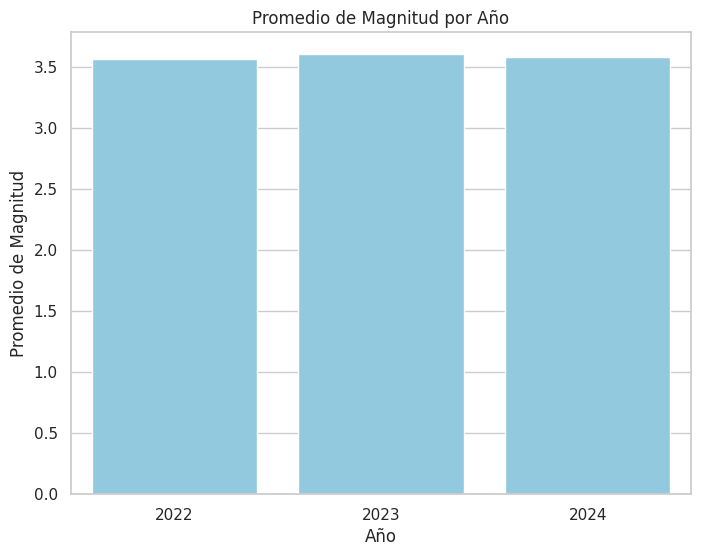

In [ ]:
df_promedios = pd.DataFrame({
    'Año': ['2022', '2023', '2024'],
    'Promedio de Magnitud': [promedio_magnitud_2022, promedio_magnitud_2023, promedio_magnitud_2024]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Año', y='Promedio de Magnitud', data=df_promedios, color='skyblue')


plt.title('Promedio de Magnitud por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Magnitud')
plt.show()


<Axes: ylabel='magnitud(ml)'>

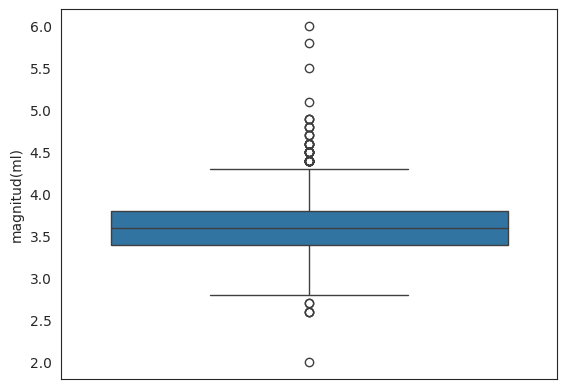

In [ ]:
sns.boxplot(df_oaxaca_2023['magnitud(ml)'])

<Axes: ylabel='magnitud(ml)'>

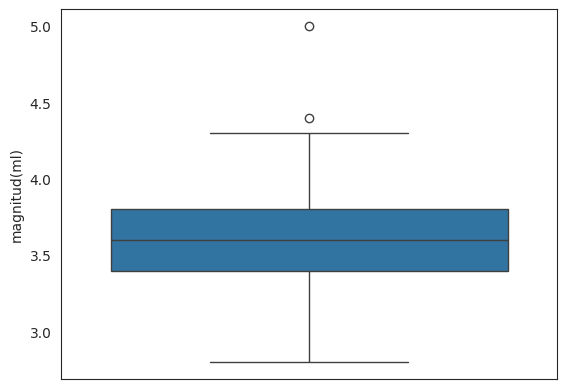

In [ ]:
sns.boxplot(df_oaxaca_2024['magnitud(ml)'])

Generamos una grafica de densidad de los dataset que separamos para poder observar las fechas en que se presentaron los sismos más fuertes

<ipython-input-96-6d0960e7b078>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_oaxaca_2023, x='magnitud(ml)', y='fecha', shade=True, label='2023')
<ipython-input-96-6d0960e7b078>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_oaxaca_2024, x='magnitud(ml)', y='fecha', shade=True, label='2024')


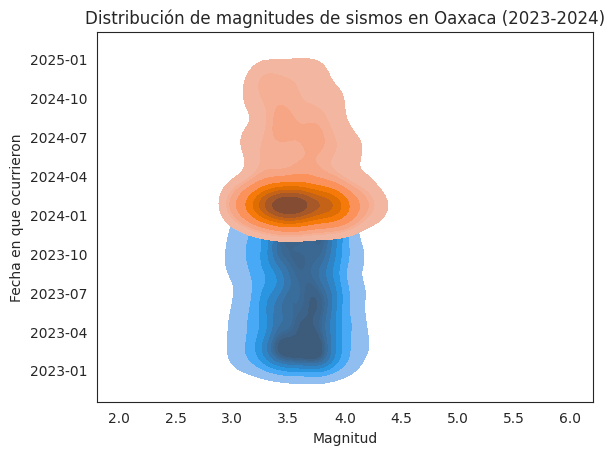

In [ ]:
# Generar la gráfica de densidad para los registros de sismos ocurridos en Oaxaca en 2023
sns.kdeplot(data=df_oaxaca_2023, x='magnitud(ml)', y='fecha', shade=True, label='2023')

# Generar la gráfica de densidad para los registros de sismos ocurridos en Oaxaca en 2024
sns.kdeplot(data=df_oaxaca_2024, x='magnitud(ml)', y='fecha', shade=True, label='2024')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de magnitudes de sismos en Oaxaca (2023-2024)')
plt.xlabel('Magnitud')
plt.ylabel('Fecha en que ocurrieron')

# Mostrar la gráfica
plt.show()

<ipython-input-24-0582755e215a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_oaxaca_2024.corr(), annot=True, linewidths=2.5);


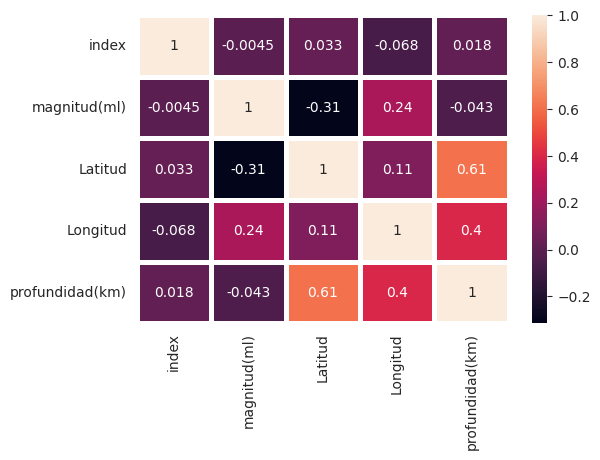

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_oaxaca_2024.corr(), annot=True, linewidths=2.5);

De manera adicional, al explorar los datos que registran la fecha y la magnitud de los sismos en México, podemos examinar si existe algún patrón estacional en la ocurrencia de estos eventos a lo largo de los meses

In [ ]:
# Agrupación de datos por mes
sismos_por_mes = df_sismos.groupby(df_sismos['fecha'].dt.month).size().reset_index(name='num_sismos')

<ipython-input-17-ca430d85c6c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='fecha', y='num_sismos', data=sismos_por_mes, palette="viridis")


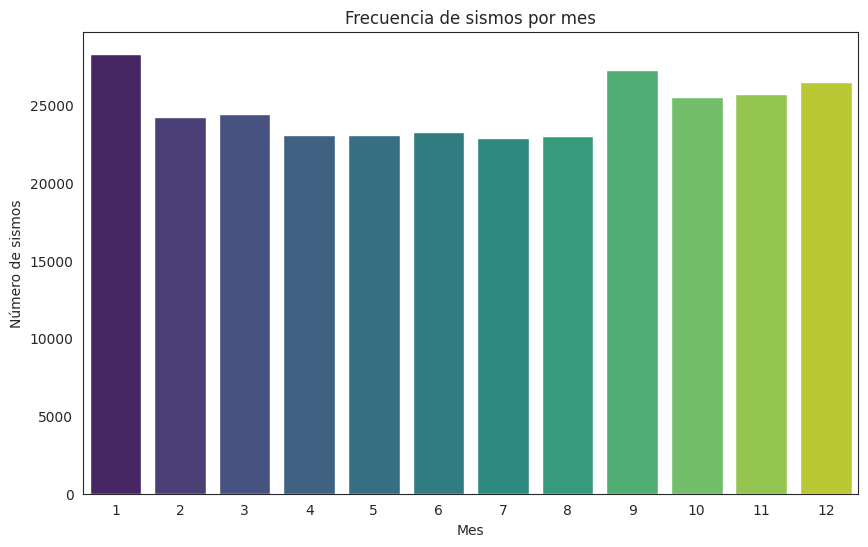

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='fecha', y='num_sismos', data=sismos_por_mes, palette="viridis")
barplot.set(xlabel='Mes', ylabel='Número de sismos', title='Frecuencia de sismos por mes')

# Mostrar el gráfico
plt.show()